<a href="https://colab.research.google.com/github/Atharva-D/Detection-and-Prediction-of-Diabetes/blob/main/KNN_model_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mounting the Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#**Setting up R environment**

In [ ]:
%load_ext rpy2.ipython

#**Importing the Libraries**

In [ ]:
%%R
install.packages('caret')
install.packages('mlbench')
install.packages('devtools') # if not already installed
library(devtools)
#install_github("dcomtois/summarytools")
#install.packages('summarytools')
install.packages("corrplot")
install.packages("gridExtra")
install.packages("timeDate")
install.packages("pROC")
install.packages("caTools")
install.packages("rpart.plot")
install.packages("graphics")
library(caret) #ML Model buidling package
library(tidyverse) #ggplot and dplyr
library(MASS) #Modern Applied Statistics with S
library(mlbench) #data sets from the UCI repository.
#library(summarytools)
library(corrplot) #Correlation plot
library(gridExtra) #Multiple plot in single grip space
library(timeDate) 
library(pROC) #ROC
library(caTools) #AUC
library(rpart.plot) #CART Decision Tree
library(e1071) #imports graphics, grDevices, class, stats, methods, utils
library(graphics) #fourfoldplot

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caret_6.0-90.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2335088 bytes (2.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

#**Reading the Data**

In [ ]:
%%R
db<-read.csv("/content/gdrive/My Drive/DS_CP/Diabetes.csv")
db

    Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1             6     148            72            35       0 33.6
2             1      85            66            29       0 26.6
3             8     183            64             0       0 23.3
4             1      89            66            23      94 28.1
5             0     137            40            35     168 43.1
6             5     116            74             0       0 25.6
7             3      78            50            32      88 31.0
8            10     115             0             0       0 35.3
9             2     197            70            45     543 30.5
10            8     125            96             0       0  0.0
11            4     110            92             0       0 37.6
12           10     168            74             0       0 38.0
13           10     139            80             0       0 27.1
14            1     189            60            23     846 30.1
15            5     166  

In [ ]:
%%R
str(db)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : chr  "Pos" "Neg" "Pos" "Neg" ...


In [ ]:
%%R
head(db)

  Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI
1           6     148            72            35       0 33.6
2           1      85            66            29       0 26.6
3           8     183            64             0       0 23.3
4           1      89            66            23      94 28.1
5           0     137            40            35     168 43.1
6           5     116            74             0       0 25.6
  DiabetesPedigreeFunction Age Outcome
1                    0.627  50     Pos
2                    0.351  31     Neg
3                    0.672  32     Pos
4                    0.167  21     Neg
5                    2.288  33     Pos
6                    0.201  30     Neg


#**KNN_model**

In [ ]:
%%R
table(db$Outcome)


Neg Pos 
500 268 


#**kNN(form, train, test, norm = T, norm.stats = NULL, ...)**

#Arguments

**form:**An object of the class formula describing the functional form of the classification model.

**train:**The data to be used as training set.

**test:**
The data set for which we want to obtain the k-NN classification, i.e. the test set.

**norm:**A boolean indicating whether the training data should be previously normalized before obtaining the k-NN predictions (defaults to TRUE).

**norm.stats:**
This argument allows the user to supply the centrality and spread statistics that will drive the normalization. If not supplied they will default to the statistics used in the function scale(). If supplied they should be a list with two components, each beig a vector with as many positions as there are columns in the data set. The first vector should contain the centrality statistics for each column, while the second vector should contain the spread statistc values.

**...:**
Any other parameters that will be forward to the knn() function of package class.

**Splitting the Dataset:**

In [ ]:
%%R
split <- caret::createDataPartition(y = db$Outcome, times = 1, p = 0.7, list = FALSE)

train_data <- db[split,]

test_data <- db[-split,]

**Model**

In [ ]:
%%R
KNN_model <- caret::train(Outcome ~., data = train_data,
                         method = "knn",
                         metric = "ROC",
                         tuneGrid = expand.grid(.k = c(3:10)),
                         trControl = trainControl(method = "cv", number = 18,
                                                  classProbs = T, summaryFunction = twoClassSummary),
                          preProcess = c("center","scale","pca"))

KNN_model

k-Nearest Neighbors 

538 samples
  8 predictor
  2 classes: 'Neg', 'Pos' 

Pre-processing: centered (8), scaled (8), principal component signal
 extraction (8) 
Resampling: Cross-Validated (18 fold) 
Summary of sample sizes: 509, 508, 508, 508, 509, 508, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   3  0.7472641  0.8404971  0.5419192
   4  0.7653628  0.8437135  0.5141414
   5  0.7694989  0.8519006  0.5414141
   6  0.7688796  0.8546784  0.5000000
   7  0.7815039  0.8603801  0.5585859
   8  0.7891447  0.8748538  0.5479798
   9  0.7887414  0.8517544  0.5434343
  10  0.7929619  0.8491228  0.5424242

ROC was used to select the optimal model using the largest value.
The final value used for the model was k = 10.


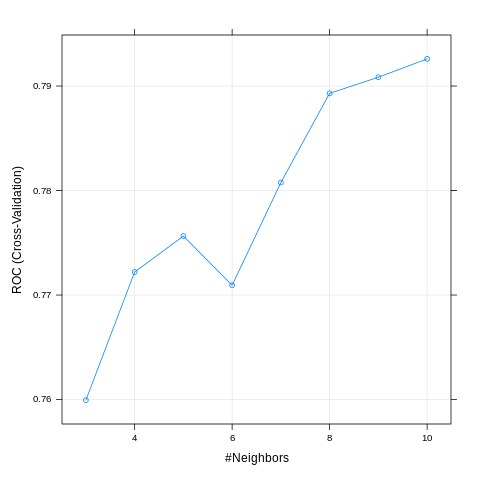

In [ ]:
%%R

plot(KNN_model)